In [ ]:
어떤 가정을 하고 있는지 알 수 있다.

회귀분석용 가상 데이터 생성 방법¶
Scikit-learn의 datasets 서브 패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()를 제공한다. make_regression() 명령으로 만들어진 데이터는 종속 변수  y 의 값이 독립 변수  x  벡터의 선형 조합인 선형관계를 가진다. ( b 는 y절편 즉, 바이어스(bias) 값이다)

여기에 정규분포  ϵ 만큼의 오차(disturbance)가 추가되는데 이 오차는 종속 변수  y 에 영향을 미치는 요인 중에서 우리가 고려하지 않는 것들의 영향을 모두 합친 것이라고 생각하면 된다. 중심 극한 정리에 따라 이러한 모든 영향의 합은 정규 분포를 따를 가능성이 높기 때문에 오차  ϵ 는 보통 기댓값이 0인 정규 분포 확률 변수로 가정한다.

y=b+wTx+ϵ : 여러개의 특성을 가지는 데이터 한 개일 경우
 
위 식에서  x ,  w 는  M 차원 벡터( M 은 입력 차원)  y ,  b ,  ϵ 는 모두 스칼라 값이다.

복수의 데이터에 대해서는 다음처럼 쓸 수 있다.

y=b1+Xw+ϵ : 데이터가 여러개
 
이 경우에는  y 는  N 차원 벡터( N 은 데이터의 갯수),  X 는  N×M 차원 행렬( M 은 입력 차원),  w 는  M 차원 벡터,  ϵ 는  N 차원 벡터,  1 는  N 차원 1-벡터이다.

make_regression() 명령은 내부적으로 입력(독립 변수) 데이터인  X  행렬, 오차  ϵ  벡터, 계수  w  벡터를 확률적으로 생성한 후, 위 관계식에 따라 출력(종속 변수) 데이터  y  벡터를 계산하여  X ,  y  값을 출력한다. 자세한 사용법은 다음과 같다.

`X, y = make_regression(...)`

또는

`X, y, w = make_regression(..., coef=True, ...)`

입력 인수는 다음과 같다.

`n_samples` : 정수 (옵션, 디폴트 100)
표본 데이터의 갯수  N 
`n_features` : 정수 (옵션, 디폴트 100)
독립 변수(feature)의 수(차원)  M 
`n_targets` : 정수 (옵션, 디폴트 1)
종속 변수(target)의 수(차원)
`bias` : 실수 (옵션, 디폴트 0.0)
y 절편
`noise` : 실수 (옵션, 디폴트 0.0) - noise 가 0이면 X로 y가 모두 설명이 됨(직선)
출력 즉, 종속 변수에 더해지는 오차  ϵ 의 표준 편차
`coef` : 불리언 (옵션, 디폴트 False)
True 이면 선형 모형의 계수도 출력
`random_state` : 정수 (옵션, 디폴트 None)
난수 발생용 시드값


In [232]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [234]:
X, w

(array([[ 0.97873798],
        [ 2.2408932 ],
        [ 1.86755799],
        [ 0.95008842],
        [ 1.76405235],
        [ 0.4105985 ],
        [-0.97727788],
        [ 0.40015721],
        [-0.10321885],
        [-0.15135721]]), array(79.17250381))

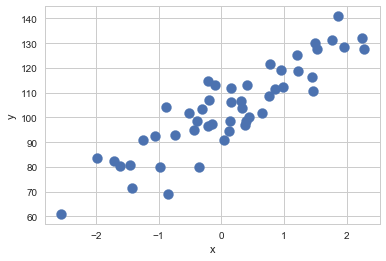

In [10]:
%matplotlib inline
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

연습 문제 1¶
make_regression과 같은 기능을 하는 함수 make_regression2를 만들어라. 단 make_regression2는 coef=True 라고 가정한다. 즉 항상 가중치 계수를 반환한다. 또한 1차원 독립 변수만 생성할 수 있으므로 다음과 같은 인수만 가진다.

n_samples
bias
noise
random_state
make_regression2 함수에 coef 인수를 추가하여 make_regression3 함수를 만들어라. make_regression3 함수는 가중치를 스스로 생성하지 않고 coef 인수로 받은 가중치 계수 값을 그대로 사용하며 가중치 계수를 반환하지 않는다.

In [263]:
def make_regression2(n_samples, bias, noise, random_state):
    np.random.seed(random_state)
    X = np.random.randn(n_samples)
    b = bias
    ep = np.random.randn(n_samples)*noise/3
    w = np.random.randn(1)
    y = b + w*X + ep
    return X, y, b, w, ep

In [266]:
X, y, b, w, ep = make_regression2(n_samples=50, bias=3, noise=3, random_state=0)

In [243]:
X

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

In [244]:
y

array([-24.37960048,   9.11659993,  10.61810337,  -6.77134541,
        23.73931277, -10.51892913,   2.46136715,   1.28686755,
        18.43602258,  17.26305342,   4.39843694,   5.2567424 ,
        -6.67584584, -16.93554738,  -0.9445356 ,   4.21361449,
        13.73628577,  15.23891779,  -1.20153624,   0.87253711])

In [249]:
w, b

(array([-1.04855297]), 3)

In [250]:
ep

array([-12.76494908,   3.26809298,   4.32218099,  -3.7108251 ,
        11.34877312,  -7.27182837,   0.22879259,  -0.93591925,
         7.66389607,   7.34679385,   0.77473713,   1.8908126 ,
        -4.43892874,  -9.90398234,  -1.73956075,   0.78174485,
         6.1514534 ,   6.01189924,  -1.93663409,  -1.51151375])

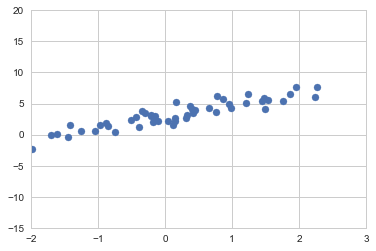

In [267]:
plt.xlim(-2, 3)
plt.ylim(-15, 20)
plt.scatter(X, y)

In [ ]:
make_regression 명령은 위에서 설명한 인수 이외에도 다음과 같은 인수를 가질 수 있다.

n_informative : 정수 (옵션, 디폴트 10) : X와 Y가 관계있는지
독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
effective_rank: 정수 또는 None (옵션, 디폴트 None) : x들 간에 상관관계가 있는지
독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
tail_strength : 0부터 1사이의 실수 (옵션, 디폴트 0.5) : x들 간에 상관관계가 있는지, 0, 1이면 코릴레이션인 전반적으로 늘어나거나 감소
        공분산이 nbyn / 2개가 발생하므로 너무 많아서 대표하는 값만 넣도록 하는것
effective_rank가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다.
예를 들어 2차원의 x 데이터 중 실제로 y값에 영향을 미치는 독립 변수는 하나 뿐이라면 다음처럼 n_informative=1로 설정한다.

array([[ 47.5431146 ],
       [ 84.60560134],
       [131.09298076],
       [181.29922354],
       [233.5013812 ],
       [131.88110117],
       [137.20705164],
       [ 59.96820329],
       [ -6.17554223],
       [124.639066  ],
       [ 51.49953198],
       [ 79.81952981],
       [  7.92651763],
       [154.55792402],
       [ 11.96730036],
       [167.24781801],
       [ 90.10697887],
       [ 58.06415472],
       [ 40.26512924],
       [ 29.47521548],
       [ 73.22549093],
       [277.61698746],
       [167.46572572],
       [121.33659327],
       [ 75.22840147],
       [ 51.65846425],
       [102.47827403],
       [145.80048542],
       [208.55222544],
       [ 37.24617548],
       [ 72.93654777],
       [ 33.73848126],
       [116.88850749],
       [172.89287434],
       [192.45898132],
       [ 68.29301456],
       [ 57.94240506],
       [258.71803893],
       [-89.16666685],
       [171.82648428],
       [267.51735412],
       [211.50394103],
       [ 30.67456893],
       [ 35

array([[102.02701439],
       [ 81.59750943]])

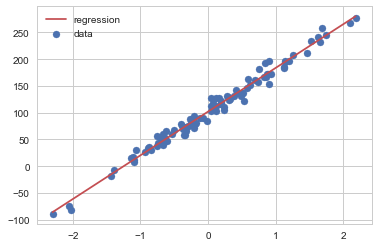